<a href="https://colab.research.google.com/github/azizyucelen/Principal-Component-Analysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Examples/PCA/2015_2019_lab_v1_values.csv')
#df = pd.read_excel('/content/drive/MyDrive/Examples/PCA/2015_2019_lab_v1_values.xlsx') 
#df.head()
#df.shape
df.replace([np.inf, -np.inf], np.nan) #convert infs to nans
df = df.dropna(axis = 1, how = 'any') #remove nans https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df = df._get_numeric_data() #keep only numeric features
X = df.values
X.shape
#X

(1309, 31)

In [ ]:
#Import the class
from sklearn.preprocessing import StandardScaler
# Create the object
scaler = StandardScaler()
# Calculate the mean and standard deviation
scaler.fit (X)
# Transform the values
X_scaled = scaler.transform (X)

**Step 2: Create a Covariance Matrix and Select n_components**
**Method 1: If your sole intention of doing PCA is for data visualization, you should select 2 or 3 principal components.** [>>Link](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d)

If your sole intention of doing PCA is for data visualization, you should select 2 or 3 principal components.PCA is extremely useful for data visualization. Visualization of high-dimensional data can be achieved through PCA.
Since we are only familiar with 2D and 3D plots, we should convert high-dimensional data into 2 or 3-dimensional data to visualize them on 2D or 3D plots. This can be achieved through PCA. For a 2D plot, we need to select 2 principal components.For a 3D plot, we need to select 3 principal components.

---
**Method 2: If you want an exact amount of variance to be kept in data after applying PCA, specify a float between 0 and 1 to the hyperparameter n_components.** [>>Link](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d)

This is the easiest way to select the best number of principal components for the dataset. For example, **if you want to keep 95% of the variance in the original data after applying PCA, you can specify the float 0.95 to the hyperparameter n_components as follows.**




In [ ]:
from sklearn.decomposition import PCA
# Grafik işaretlemesi için optimum komponent sayısını belirleme
pca_get_components = PCA(n_components=0.95, random_state=2020)
pca_get_components.fit(X_scaled) # covariance matrix
X_components =  pca_get_components.transform (X_scaled)

pca_start = PCA(n_components=31, random_state=2020)
pca_start.fit(X_scaled) # covariance matrix
X_pca =  pca_start.transform (X_scaled)
#X_pca.shape
#X_pca

**Step 3: Calculate Eigenvalues**[>>Link](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d)                                    

In the following array we see that the first feature explains roughly 33% of the variance within our data set while the first two explain 58.9 and so on. If we employ 10 features we capture 98.4% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained)**.You can get eigenvalues using explained_variance_ attribute of the PCA() class.**

In [ ]:
pca_start.explained_variance_ratio_* 100 #calculate variance ratios


array([16.30774527, 10.14781657,  7.0171044 ,  4.8941327 ,  3.96735294,
        3.70255977,  3.5243504 ,  3.48629051,  3.43882318,  3.29278858,
        3.22657087,  3.10317423,  3.06149071,  2.97758806,  2.9264541 ,
        2.83760881,  2.70436225,  2.66527626,  2.62132081,  2.48331949,
        2.32334301,  2.30206682,  2.0953711 ,  1.57467709,  1.46643778,
        1.25358589,  0.27769478,  0.13436088,  0.09421779,  0.06046629,
        0.03164864])

In [ ]:
np.cumsum (pca_start.explained_variance_ratio_ * 100)

array([ 16.30774527,  26.45556184,  33.47266624,  38.36679894,
        42.33415188,  46.03671165,  49.56106205,  53.04735257,
        56.48617575,  59.77896433,  63.00553519,  66.10870943,
        69.17020014,  72.1477882 ,  75.0742423 ,  77.91185111,
        80.61621336,  83.28148963,  85.90281043,  88.38612992,
        90.70947293,  93.01153975,  95.10691085,  96.68158794,
        98.14802572,  99.40161162,  99.6793064 ,  99.81366728,
        99.90788507,  99.96835136, 100.        ])

**Method 3: Plot the explained variance percentage of individual components and the percentage of total variance captured by all principal components.**

This is the most advanced and effective method that can be used to select the best number of principal components for the dataset. In this method, we create the following type of plot.

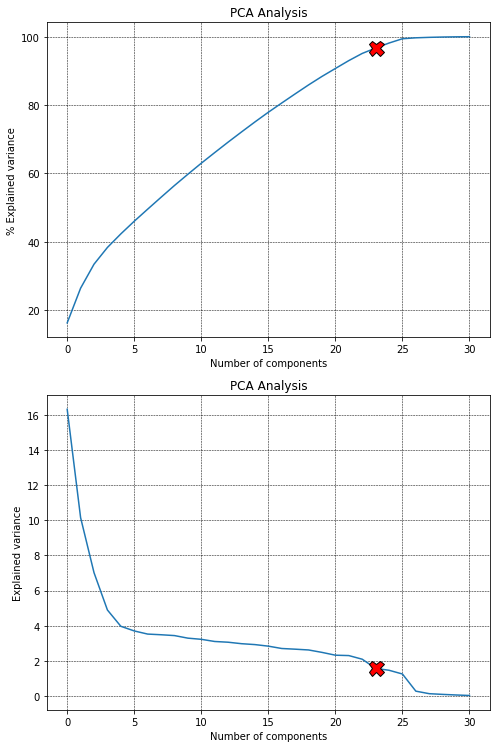

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 10.50]
plt.rcParams["figure.autolayout"] = True
m=[len(pca_get_components.explained_variance_ratio_)]
#plt.xlabel( "Number of components")
#plt.ylabel ( "% Explained variance ")
#plt.title('PCA Analysis')
#plt.style.context('seaborn-whitegrid')
fig, axs = plt.subplots(2)
axs[0].plot (np.cumsum (pca_start.explained_variance_ratio_*100), marker ='X',ms = 15, mec = 'k', mfc = 'r', markevery=m)
axs[0].set_title('PCA Analysis')
axs[0].set(xlabel='Number of components', ylabel='% Explained variance')
axs[0].grid(axis ='both', color = 'k', linestyle = '--', linewidth = 0.5)

axs[1].plot (pca_start.explained_variance_ratio_*100, marker ='X',ms = 15, mec = 'k', mfc = 'r', markevery=m)
axs[1].set_title('PCA Analysis')
axs[1].set(xlabel='Number of components', ylabel='Explained variance')

axs[1].grid(axis = 'both', color = 'k', linestyle = '--', linewidth = 0.5)# axis = 'both' or 'x' or 'y' 
#plt.plot (np.cumsum (pca_start.explained_variance_ratio_*100), marker ='X',ms = 15, mec = 'k', mfc = 'r', markevery=m)
#plt.plot ((pca_start.explained_variance_ratio_*100), marker ='X',ms = 15, mec = 'k', mfc = 'r', markevery=m)

#plt.grid(axis = 'x', color = 'k', linestyle = '--', linewidth = 0.5)
#Save figure to file
plt.savefig ('/content/drive/MyDrive/Examples/PCA/PCA_Analysis_plot.png', dpi=1600)

In [ ]:
#Save PCA Components as excel file
df_new = pd.DataFrame(X_components)
df_new.to_excel('/content/drive/MyDrive/Examples/PCA/dataOutput.xlsx', index=False)
#df_new.to_csv('dataOutput.csv', index=False)